### 1. chargement et traitement des données
Ce projet utilise l'ensemble de données public  "Student Adaptability Level in Online Education" sur www.kaggle.com, pour prédire le niveau d'adaptabilité des étudiants dans l'enseignement en ligne à l'aide d'approches d'apprentissage automatique.

Commençons par importer les données en tant que dataframe "pandas".

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


Il semble que toutes nos variables soient des objets. Confirmons avant de traiter les données.

In [2]:
#vérifier la structure des données
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

Afin de construire et d'explorer une gamme de modèles de classificateurs, nous devrons convertir les données en entiers codés. Pour commencer, trions par ordre alphabétique les value_counts de chaque variable et enregistrons-les dans un dictionnaire de listes de variables. Nous utiliserons ensuite l'index de liste de chaque valeur comme entier dans une nouvelle trame de données codée.

In [3]:
#vérifier la distribution de toutes les valeurs de données et les valeurs de liste dans dict
values_dict = {}
for column in df:
    print(column)
    print(df[column].value_counts().sort_index(), '\n')
    values_dict[column] = df[column].value_counts().sort_index().index.to_list()

Gender
Boy     663
Girl    542
Name: Gender, dtype: int64 

Age
1-5       81
11-15    353
16-20    278
21-25    374
26-30     68
6-10      51
Name: Age, dtype: int64 

Education Level
College       219
School        530
University    456
Name: Education Level, dtype: int64 

Institution Type
Government        382
Non Government    823
Name: Institution Type, dtype: int64 

IT Student
No     901
Yes    304
Name: IT Student, dtype: int64 

Location
No     270
Yes    935
Name: Location, dtype: int64 

Load-shedding
High     201
Low     1004
Name: Load-shedding, dtype: int64 

Financial Condition
Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64 

Internet Type
Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64 

Network Type
2G     19
3G    411
4G    775
Name: Network Type, dtype: int64 

Class Duration
0      154
1-3    840
3-6    211
Name: Class Duration, dtype: int64 

Self Lms
No     995
Yes    210
Name: Self Lms, dtype: int64 

Device
Co

In [4]:
#inspecter les valeurs
values_dict

{'Gender': ['Boy', 'Girl'],
 'Age': ['1-5', '11-15', '16-20', '21-25', '26-30', '6-10'],
 'Education Level': ['College', 'School', 'University'],
 'Institution Type': ['Government', 'Non Government'],
 'IT Student': ['No', 'Yes'],
 'Location': ['No', 'Yes'],
 'Load-shedding': ['High', 'Low'],
 'Financial Condition': ['Mid', 'Poor', 'Rich'],
 'Internet Type': ['Mobile Data', 'Wifi'],
 'Network Type': ['2G', '3G', '4G'],
 'Class Duration': ['0', '1-3', '3-6'],
 'Self Lms': ['No', 'Yes'],
 'Device': ['Computer', 'Mobile', 'Tab'],
 'Adaptivity Level': ['High', 'Low', 'Moderate']}

L' **Age**, **Education Level** et la **Financial Condition** sont ordinaux. C'est-à-dire qu'ils ont un ordre de classement naturel. Étant donné que ces valeurs sont actuellement classées par ordre alphabétique, l'ordre actuel de la liste ne correspond pas à leur ordination naturelle. Bien que cela n'affecte pas la précision de nos modèles de classificateurs, cela complique l'exploration des données et l'interprétation des modèles. Pour faciliter les choses sur la route, réordonnons manuellement ces valeurs maintenant avant de traiter la trame de données codée finale. N'oubliez pas que lors de la création de modèles dynamiques, toutes les nouvelles données devront être prétraitées de la même manière.

In [5]:
#réorganiser les listes
order = [0,5,1,2,3,4]
values_dict['Age'] = [values_dict['Age'][i] for i in order]

order = [1,0,2]
values_dict['Education Level'] = [values_dict['Education Level'][i] for i in order]
values_dict['Financial Condition'] = [values_dict['Financial Condition'][i] for i in order]

order = [1,0]
values_dict['Institution Type'] = [values_dict['Institution Type'][i] for i in order]
values_dict['Load-shedding'] = [values_dict['Load-shedding'][i] for i in order]

order = [1,2,0]
values_dict['Adaptivity Level'] = [values_dict['Adaptivity Level'][i] for i in order]

values_dict

{'Gender': ['Boy', 'Girl'],
 'Age': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'],
 'Education Level': ['School', 'College', 'University'],
 'Institution Type': ['Non Government', 'Government'],
 'IT Student': ['No', 'Yes'],
 'Location': ['No', 'Yes'],
 'Load-shedding': ['Low', 'High'],
 'Financial Condition': ['Poor', 'Mid', 'Rich'],
 'Internet Type': ['Mobile Data', 'Wifi'],
 'Network Type': ['2G', '3G', '4G'],
 'Class Duration': ['0', '1-3', '3-6'],
 'Self Lms': ['No', 'Yes'],
 'Device': ['Computer', 'Mobile', 'Tab'],
 'Adaptivity Level': ['Low', 'Moderate', 'High']}

In [6]:
#construire une trame de données codée en nombre entier
coded_dict = {}
for column in df:
    coded_dict[column] = []
    for i in range(0,df.shape[0]):
        coded_dict[column].append(values_dict[column].index(df[column][i]))

coded_df = pd.DataFrame(coded_dict)
coded_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,4,2,0,0,1,0,1,1,2,2,0,2,1
1,1,4,2,0,0,1,1,1,0,2,1,1,1,1
2,1,3,1,1,0,1,0,1,1,2,1,0,1,1
3,1,2,0,0,0,1,0,1,0,2,1,0,1,1
4,1,3,0,0,0,1,0,0,0,1,0,0,1,0


### 2. Exploration des données
Maintenant que les données sont codées en nombres entiers, nous pouvons rechercher toute tendance évidente dans l'ensemble de données. On va commencer avec une matrice de corrélation, qui visualise rapidement les variables corrélées. Ici, nous utiliserons la * corrélation de rang de Spearmans * pour tenir compte du fait qu'il s'agit d'entiers classés, et nous tracerons la matrice résultante sous forme de carte 'heatmap'.

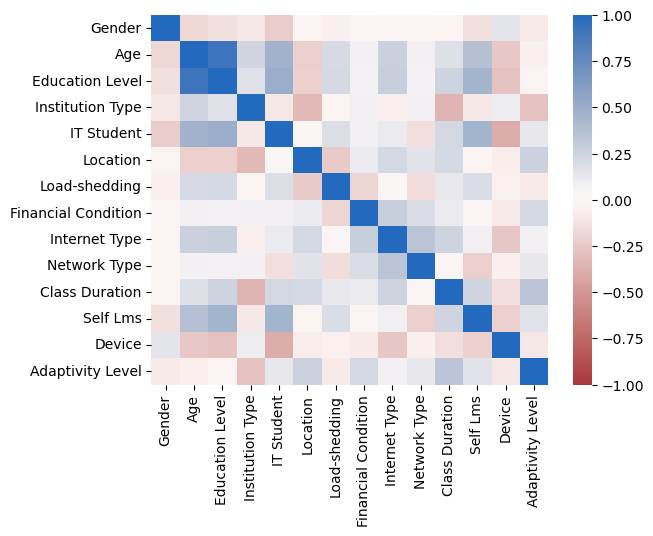

In [7]:
#matrice de corrélation 
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.color_palette("vlag", as_cmap=True).reversed()
sns.heatmap(coded_df.corr(method='spearman'), cmap=cmap, vmin=-1, vmax=1)
plt.show()

Étant donné qu'il faut du temps pour obtenir une éducation (et que la plupart d'entre nous progressons à un rythme similaire), il n'est pas surprenant que l'**Age** et le **Education Level** soient assez fortement corrélés. Cependant, il n'y a pas de fortes corrélations individuelles avec le **Adaptivity Level**, ce qui indique la nécessité d'une exploration multivariée. Notamment, il existe de faibles corrélations positives entre la variable de réponse et la **Class Duration**, la **Financial Condition** et **Location**, ce qui semble indiquer que les étudiants bien nantis qui vivent dans une ville et reçoivent plus d'interaction avec les enseignants s'adaptent le mieux. Il existe également une faible corrélation négative avec le **Institution Type**, ce qui suggère que les écoles non gouvernementales permettent une plus grande adaptabilité que les écoles publiques.

Étant donné qu'aucune des variables n'est fortement corrélée au **Adaptivity Level**, ordonnons (réduisons graduellement) les données et voyons s'il existe des clusters dans la structure globale des données. Premièrement, nous standardiserons les données. Ensuite, nous ordonnerons avec `Principal Component Analysis`, qui projette les données complètes selon les dimensions de la plus grande variabilité

In [8]:
#diviser X et Y, et standardiser X
import numpy as np
import sklearn
from sklearn import preprocessing

Y = coded_df['Adaptivity Level'].to_numpy()
X = coded_df.loc[:, coded_df.columns != 'Adaptivity Level'].to_numpy()
xform = preprocessing.StandardScaler()
X_z = xform.fit(X).transform(X)

In [9]:
#définir la fonction de plot pca
def plot_pca(ordi,lab,y):
    '''
    Génère un biplot des 1ere et 2eme axes à partir d'un modèle d'ordination
    '''
    plt.figure()
    plt.scatter(ordi[y==0, 0], ordi[y==0, 1], color='red', label='Faible')
    plt.scatter(ordi[y==1, 0], ordi[y==1, 1], color='blue', label='Modérée')
    plt.scatter(ordi[y==2, 0], ordi[y==2, 1], color='green', label='Haut')
    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.legend()
    plt.show()

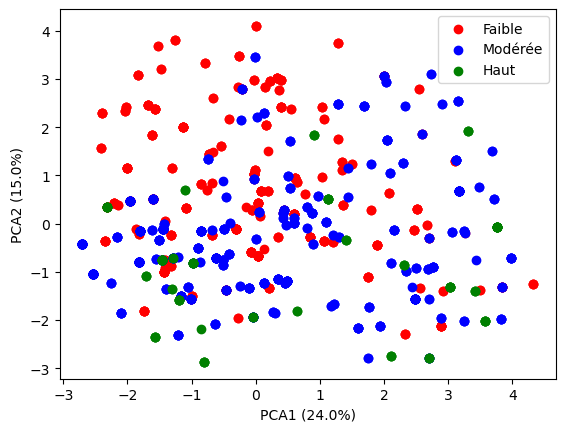

In [10]:
#entrainer et plot PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_z)
labels = [f"PCA1 ({pca.explained_variance_ratio_[0]*100:.1f}%)",
          f"PCA2 ({pca.explained_variance_ratio_[1]*100:.1f}%)"]
plot_pca(X_pca,labels,Y)

Bien qu'il y ait une légère tendance visible d'adaptabilité *faible* vers le haut à gauche et d'adaptabilité *élevée* vers le bas à droite, cette tendance est faible et très mélangée. Les premières et deuxièmes *composantes principales* ne représentent que 39,0 % de la diversité totale des données, nous ne pouvons donc pas obtenir de séparations significatives dans les données à partir de seulement 2 dimensions d'une ordination simple.

### 3. Optimisation du modèle avec GridSearchCV
Tous les algorithmes d'apprentissage automatique ont une gamme d'hyperparamètres qui affectent la façon dont ils construisent le modèle. Ceux-ci incluent les "paramètres de régularisation", les "valeurs de mise à l'échelle", les "algorithmes de résolution", la "profondeur de l'arbre" et le "nombre de voisins", entre autres. Le réglage optimal pour l'un de ces hyperparamètres est rarement évident, et il est donc nécessaire d'itérer et de mesurer la précision du modèle sur une plage de ces paramètres. `GridSearchCV` automatise ce processus en exécutant des `validations croisées` répliquées de toutes les combinaisons de ces hyperparamètres, puis en sélectionnant l'ensemble d'hyperparamètres avec la plus grande précision de modèle.

Nous commencerons par diviser au hasard les données en ensembles d'entraînement (80 %) et de test (20 %).

`GridSearchCV` testera également la division des données de formation d'entrée, et donc la précision rapportée dans la précision de formation de l'échantillon. Pour comparer et sélectionner le meilleur modèle global, nous devrons également mesurer la précision hors échantillon avec l'ensemble de test. 

In [11]:
#diviser les ensembles de données d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_z, Y, test_size=0.2, random_state=2)

In [12]:
#ignorer tous les avertissements
from warnings import simplefilter

simplefilter(action='ignore')

Nous pouvons maintenant commencer à optimiser notre premier modèle. Commençons par `Régression logistique`.
Pour notre ensemble de données, nous allons optimiser les hyperparamètres `C`, `penalty` et `solver`, tout en définissant `multi_class` sur `multinomial`. Cela se fait à l'aide d'un dictionnaire de "paramètres".
Nous créons ensuite un objet `GridSearchCV` en utilisant `parameters` un objet de modèle `Logisitic Regression` et un nombre défini de `cross-validations` (ici, nous utilisons 10). Enfin, nous optimisons notre modèle en ajustant nos données d'entraînement.

# Entrainer logistic regression

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C': np.logspace(-2, 0, 20),
              'penalty': ['none', 'l2', 'l1', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'multi_class': ['multinomial']}
lr = LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=10, verbose=0)
logreg_cv = grid_search.fit(X_train, Y_train)

Une fois que GridSearchCV a fini d'optimiser notre modèle, nous pouvons vérifier nos valeurs finales d'hyperparamètres, la précision dans l'échantillon et la précision hors échantillon.

In [14]:
#tester la régression logistique
print("Accordée hpyerparameters (meilleurs paramètres):", logreg_cv.best_params_)
print("Précision du train:", logreg_cv.best_score_)
print("Précision du test:", logreg_cv.best_estimator_.score(X_test, Y_test))

Accordée hpyerparameters (meilleurs paramètres): {'C': 0.37926901907322497, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Précision du train: 0.6981099656357388
Précision du test: 0.6929460580912863


Nous pouvons également extraire les scores dans l'échantillon pour chaque combinaison d'hyperparamètres testés afin d'explorer comment chaque paramètre affecte la précision du modèle.

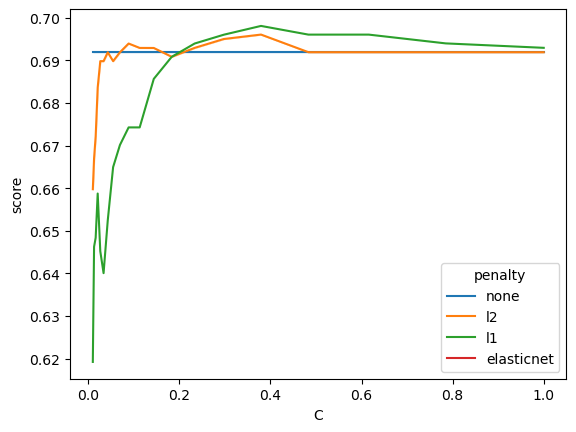

In [15]:
#tracer les scores logreg
logreg_cv_df = pd.DataFrame(logreg_cv.cv_results_['params'])
logreg_cv_df['score'] = logreg_cv.cv_results_['mean_test_score']

sns.lineplot(data=logreg_cv_df, x='C', y='score', hue='penalty')
plt.show()

Le modèle de «régression logistique» le plus précis a été obtenu avec les termes de «pentalité» l1 et l2 et une «régularisation» d'environ 0,4. Pourtant, à une précision maximale de 70 %, cela sous-performe largement le meilleur modèle de la publication originale .
Voyons si nous pouvons obtenir un meilleur résultat en utilisant `K-Nearest Neighbors`.

# Entrainer train k-nearest neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(1, 20)),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=10, verbose=0)
knn_cv = grid_search.fit(X_train, Y_train)

In [17]:
#tester k-nearest neighbors
print("Accordée hpyerparameters (meilleurs paramètres):", knn_cv.best_params_)
print("Précision du train:", knn_cv.best_score_)
print("Précision du test:", knn_cv.best_estimator_.score(X_test, Y_test))

Accordée hpyerparameters (meilleurs paramètres): {'algorithm': 'auto', 'n_neighbors': 12, 'p': 2, 'weights': 'distance'}
Précision du train: 0.9148518041237113
Précision du test: 0.8879668049792531


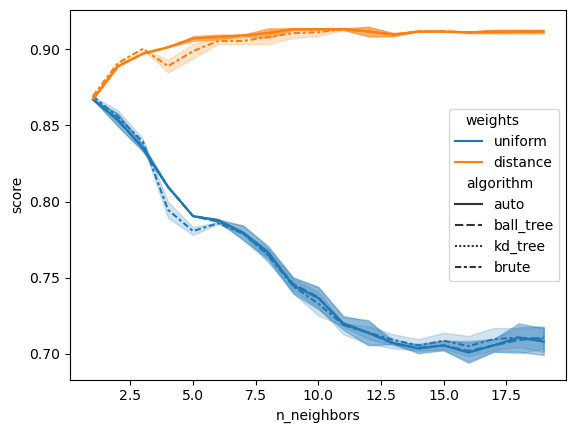

In [18]:
#tracer les scores knn
knn_cv_df = pd.DataFrame(knn_cv.cv_results_['params'])
knn_cv_df['score'] = knn_cv.cv_results_['mean_test_score']

sns.lineplot(data=knn_cv_df, x='n_neighbors', y='score', hue='weights', style='algorithm')
plt.show()

La méthode de `weighting` du voisinage était l'hyperparamètre le plus influent sur la précision du modèle "K-Nearest Neighbors". Le type d'« algorithme » de calcul a également joué un rôle important aux valeurs inférieures de « n_neighbor », mais son influence a diminué au-dessus d'environ 10 voisins. Ce modèle a atteint une précision hors échantillon de 88,80 %.

Enfin, regardons un modèle de réseau neuronal artificiel.

# Entrainer artificial neural network

In [19]:
from sklearn.neural_network import MLPClassifier
#import numpy as np
parameters = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': np.logspace(-5, 0, 10),
              'learning_rate': ['adaptive'],
              'max_iter': [1000]}
ann = MLPClassifier()
grid_search = GridSearchCV(ann, parameters, cv=10, verbose=0)
ann_cv = grid_search.fit(X_train, Y_train)

In [20]:
#tester artificial neural network
print("Accordée hpyerparameters (meilleurs paramètres):", ann_cv.best_params_)
print("Précision du train:", ann_cv.best_score_)
print("Précision du test:", ann_cv.best_estimator_.score(X_test, Y_test))

Accordée hpyerparameters (meilleurs paramètres): {'activation': 'relu', 'alpha': 0.07742636826811278, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}
Précision du train: 0.9137993986254296
Précision du test: 0.8921161825726142


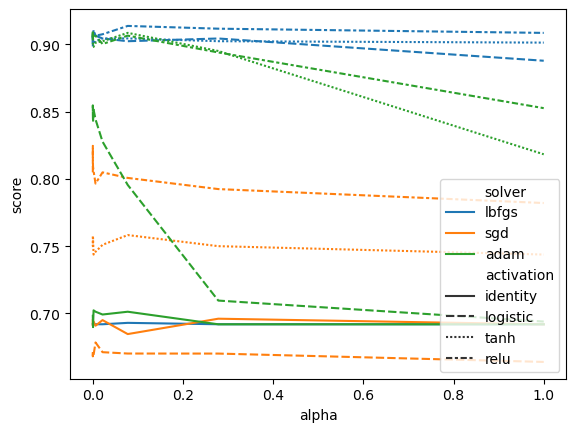

In [21]:
#tracer les scores ann 
ann_cv_df = pd.DataFrame(ann_cv.cv_results_['params'])
ann_cv_df['score'] = ann_cv.cv_results_['mean_test_score']

sns.lineplot(data=ann_cv_df, x='alpha', y='score', hue='solver', style='activation')
plt.legend(loc='lower right')
plt.show()

Le "réseau de neurones artificiels" avait une précision dans l'échantillon plus élevée que la "k-nearest neighbors".L'hyperparamètre "solver" a eu le plus grand impact sur la précision du modèle,lbfgs" étant le plus performant, en particulier avec les fonctions "activation"  tanh et relu.

### 4. Comparaisons finales des modèles
Enfin, nous comparerons directement les précisions des modèles et créerons des matrices de confusion pour voir où chaque modèle excelle et rencontre des difficultés.

In [22]:
#comparer les modeles
print("Logistic Regression: {}\nKNN: {}\nANN: {}".format(
    logreg_cv.best_estimator_.score(X_test, Y_test),
    knn_cv.best_estimator_.score(X_test, Y_test),
    ann_cv.best_estimator_.score(X_test, Y_test)))

Logistic Regression: 0.6929460580912863
KNN: 0.8879668049792531
ANN: 0.8921161825726142


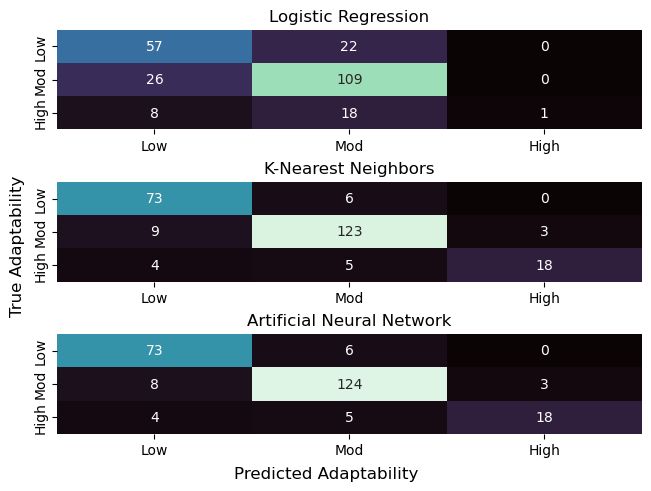

In [23]:
#tracer les matrices de confusion à l'aide des prédictions du modèle
from sklearn.metrics import confusion_matrix

logreg_cm = confusion_matrix(Y_test, logreg_cv.predict(X_test))
knn_cm = confusion_matrix(Y_test, knn_cv.predict(X_test))
ann_cm = confusion_matrix(Y_test, ann_cv.predict(X_test))

vmax = max(np.amax(logreg_cm), np.amax(knn_cm), np.amax(ann_cm))

fig, axs = plt.subplots( 3, constrained_layout=True)

sns.heatmap(logreg_cm, annot=True, cbar=False, ax=axs[0], cmap='mako', fmt='g', vmin=0, vmax=vmax)
sns.heatmap(knn_cm, annot=True, cbar=False, ax=axs[1], cmap='mako', fmt='g', vmin=0, vmax=vmax)
sns.heatmap(ann_cm, annot=True, cbar=False, ax=axs[2], cmap='mako', fmt='g', vmin=0, vmax=vmax)

axs[0].set_title('Logistic Regression')
axs[1].set_title('K-Nearest Neighbors')
axs[2].set_title('Artificial Neural Network')

axs[0].xaxis.set_ticklabels(['Low', 'Mod', 'High'])
axs[1].xaxis.set_ticklabels(['Low', 'Mod', 'High'])
axs[2].xaxis.set_ticklabels(['Low', 'Mod', 'High'])

axs[0].yaxis.set_ticklabels(['Low', 'Mod', 'High'])
axs[1].yaxis.set_ticklabels(['Low', 'Mod', 'High'])
axs[2].yaxis.set_ticklabels(['Low', 'Mod', 'High'])

fig.supxlabel('Predicted Adaptability')
fig.supylabel('True Adaptability')

plt.show()

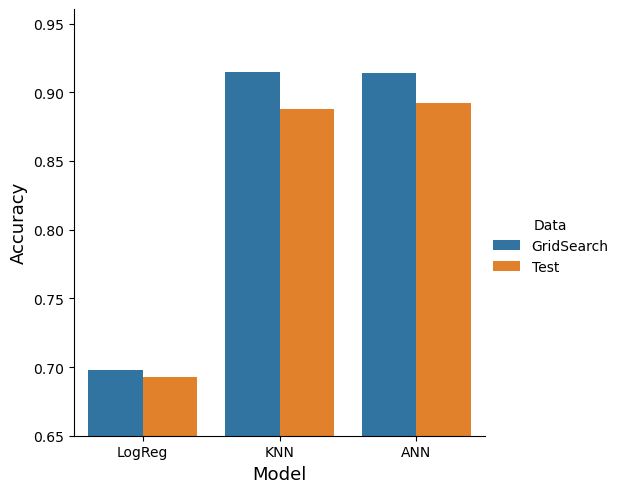

In [24]:
#comparer les précisions des modèles
model_acc = {'Model': ['LogReg', 'KNN', 'ANN',
                       'LogReg', 'KNN','ANN'],
             'Accuracy': [logreg_cv.best_score_,
                          knn_cv.best_score_,
                          ann_cv.best_score_,
                          logreg_cv.best_estimator_.score(X_test, Y_test),
                          knn_cv.best_estimator_.score(X_test, Y_test),
                          ann_cv.best_estimator_.score(X_test, Y_test)],
             'Data': ['GridSearch', 'GridSearch', 'GridSearch',
                      'Test', 'Test', 'Test']}

model_df = pd.DataFrame(model_acc)

sns.catplot(kind='bar', y='Accuracy', x='Model', hue='Data', data=model_df)
plt.ylim(0.65, None)
plt.xlabel('Model', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.show()

### 5. Conclusions
Les auteurs ont recueilli un éventail de données démographiques, économiques et autres sur les étudiants en ligne, ainsi que des scores individuels pour leur adaptabilité à l'enseignement en ligne.Nous avons ensuite utilisé ces données pour prédire le niveau d'adaptabilité des nouveaux étudiants en construisant un modèle de classificateur pédagogique supervisé. Nous avons comparé la précision d'une gamme de modèles, y compris la « régression logistique », les « K-Nearest Neighbors » et le « réseau de neurones artificiels », ce qui nous donne de bonnes références lorsque nous développons et comparons avec notre propre ensemble de modèles de classificateurs.

Comme nous pouvons le voir, `GridSearchCV` est un outil indispensable pour la sélection de modèles d'apprentissage automatique, permettant des comparaisons rapides et pratiques entre les hyperparamètres de plusieurs modèles.
